169017344/169001437 [==============================] - 11s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                      

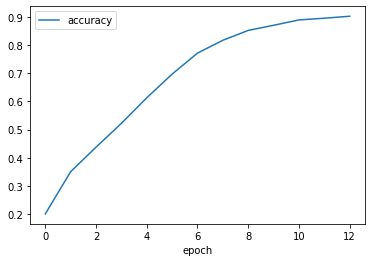

313/313 [==============================] - 1s 4ms/step - loss: 5.6538 - accuracy: 0.3541
Test error: 5.653843879699707
Test accuracy:  0.35409998893737793
Predicted value:  70
Correct value:  71


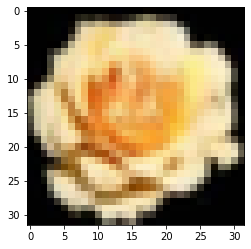

In [1]:
import pandas as pd
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
from keras.models import Sequential
import numpy as np
from keras.utils import np_utils
from keras.layers import Dense, Activation, Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
from keras.callbacks import EarlyStopping 

# Load data
(train_images,train_labels),(test_images,test_labels)=datasets.cifar100.load_data()

# Force to data type
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
# Divide in 255 to ensure value always between 0 and 1
train_images/=255
test_images/=255

# Convert labels to one hot-encoding
train_labels=np_utils.to_categorical(train_labels,100)
test_labels=np_utils.to_categorical(test_labels,100)

# Create model
model = Sequential()
model.add(Conv2D(input_shape=(32, 32, 3),  kernel_initializer='he_uniform',kernel_size=(2,2),padding='same',strides=(2,2),filters=32))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='same'))
model.add(Conv2D(kernel_size=(2,2),padding='same',strides=(2,2),filters=64))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1),padding='same'))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.summary()

# compile model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
history=model.fit(train_images,train_labels,batch_size=32,epochs=100,verbose=1,validation_data=(test_images,test_labels),callbacks=[EarlyStopping(monitor='val_loss',patience=10)])

# Plot
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.show()

#  Evaluate
score = model.evaluate(test_images,test_labels, verbose=1)
print('Test error:',score[0])
print('Test accuracy: ',score[1])

#Predict
plt.imshow(test_images[20].reshape(32,32,3))
y_predict = model.predict(test_images[20].reshape(1,32,32,3))
print('Predicted value: ', np.argmax(y_predict))
print('Correct value: ',np.argmax(test_labels[10]))